<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>👩🏻‍💻  Student Grade Prediction </b></h1></center>

<h8><b style="color:green; font-size: 18px;">

# Predict student performance in secondary education (high school).

_Dataset Characteristics_
Multivariate

_Subject Area_
Social Science

_Associated Tasks_
Classification, Regression

_Feature Type_
Integer

_Instances_
649

_Features_
30 </b></h8>

<center><h1 style="background-color: darkgreen; color: white; font-size: 2.5px;"><b> <div style="text-align;">
    <span style="font-size:24px;">Content:</span><br><br></div></b></h1></center>
    <span style="font-size:20px;">📈 Descriptive analytics</span><br>
    <span style="font-size:20px;">🔧 Preprocessing</span><br>
    <span style="font-size:20px;">🛠️ Modelling</span><br>

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>👩🏻‍💻 Introduction</b></h1></center>

In [1]:
# Let's install ucimlrepo
!pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [3]:
# Let's fetch dataset
student_performance = fetch_ucirepo(id=320)

# Let's convert data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# Finally , convert full data
full_data = pd.concat([X,y], axis = 1)

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b> 🗯  Business Understanding </b></h1></center>

In [ ]:
# Let's look at all columns
pd.set_option('display.max_column', None)

# Let's look at all columns
full_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
# Let's look at columns and examine them
full_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<center><h1 style="background-color: darkgreen; color: white; font-size: 25px;"><b>🗯 Let's write a description of each column in the dataset:</b></h1></center>

1. **school**: The school the student attends (binary categorical: 'GP' for Gabriel Pereira or 'MS' for Mousinho da Silveira).
2. **sex**: Gender of the student (binary categorical: 'F' for female or 'M' for male).
3. **age**: Age of the student (numeric).
4. **address**: Type of address of the student (binary categorical: 'U' for urban or 'R' for rural).
5. **famsize**: Family size (binary categorical: 'LE3' for less than or equal to 3 or 'GT3' for greater than 3).
6. **Pstatus**: Parent's cohabitation status (binary categorical: 'T' for living together or 'A' for apart).
7. **Medu**: Mother's education level (ordinal categorical: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education).
8. **Fedu**: Father's education level (ordinal categorical: same scale as 'Medu').
9. **Mjob**: Mother's job (categorical).
10. **Fjob**: Father's job (categorical).
11. **reason**: Reason for choosing this school (categorical).
12. **guardian**: Student's guardian (categorical: 'mother', 'father', or 'other').
13. **traveltime**: Home to school travel time (ordinal categorical: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - more than 1 hour).
14. **studytime**: Weekly study time (ordinal categorical: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours).
15. **failures**: Number of past class failures (numeric).
16. **schoolsup**: Extra educational support (binary categorical: yes or no).
17. **famsup**: Family educational support (binary categorical: yes or no).
18. **paid**: Extra paid classes within the course subject (binary categorical: yes or no).
19. **activities**: Extra-curricular activities (binary categorical: yes or no).
20. **nursery**: Attended nursery school (binary categorical: yes or no).
21. **higher**: Wants to take higher education (binary categorical: yes or no).
22. **internet**: Internet access at home (binary categorical: yes or no).
23. **romantic**: In a romantic relationship (binary categorical: yes or no).
24. **famrel**: Quality of family relationships (ordinal categorical: from 1 - very bad to 5 - excellent).
25. **freetime**: Free time after school (ordinal categorical: from 1 - very low to 5 - very high).
26. **goout**: Going out with friends (ordinal categorical: from 1 - very low to 5 - very high).
27. **Dalc**: Workday alcohol consumption (ordinal categorical: from 1 - very low to 5 - very high).
28. **Walc**: Weekend alcohol consumption (ordinal categorical: from 1 - very low to 5 - very high).
29. **health**: Current health status (ordinal categorical: from 1 - very bad to 5 - very good).
30. **absences**: Number of school absences (numeric).
31. **G1**: First period grade (numeric).
32. **G2**: Second period grade (numeric).
33. **G3**: Final grade (numeric).

In [ ]:
# Let's look at unique values of each columns
for i,y in enumerate(full_data.columns):
    print(i+1,y)
    print("=======================")
    print(full_data[y].unique()[:100])
    print("=======================\n\n")

1 school
['GP' 'MS']


2 sex
['F' 'M']


3 age
[18 17 15 16 19 22 20 21]


4 address
['U' 'R']


5 famsize
['GT3' 'LE3']


6 Pstatus
['A' 'T']


7 Medu
[4 1 3 2 0]


8 Fedu
[4 1 2 3 0]


9 Mjob
['at_home' 'health' 'other' 'services' 'teacher']


10 Fjob
['teacher' 'other' 'services' 'health' 'at_home']


11 reason
['course' 'other' 'home' 'reputation']


12 guardian
['mother' 'father' 'other']


13 traveltime
[2 1 3 4]


14 studytime
[2 3 1 4]


15 failures
[0 3 1 2]


16 schoolsup
['yes' 'no']


17 famsup
['no' 'yes']


18 paid
['no' 'yes']


19 activities
['no' 'yes']


20 nursery
['yes' 'no']


21 higher
['yes' 'no']


22 internet
['no' 'yes']


23 romantic
['no' 'yes']


24 famrel
[4 5 3 1 2]


25 freetime
[3 2 4 1 5]


26 goout
[4 3 2 1 5]


27 Dalc
[1 2 5 3 4]


28 Walc
[1 3 2 4 5]


29 health
[3 5 1 2 4]


30 absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


31 G1
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]


32 G2
[11 13 14 12 16 17  

<center><h1 style="background-color: darkgreen; color: white; font-size: 25px;"><b>⁉ What is the case and what do we understand?:</b></h1></center>

  - This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

For Additional Information:
https://archive.ics.uci.edu/dataset/320/student+performance


<h8><b style="color:green; font-size: 18px;">❕ There are many way for handle this problem but firstly let's look at visualizations of dataset </b></h8>

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>♻ Data Preprocessing </b></h1></center>

In [ ]:
# Let's change types first
full_data.select_dtypes(exclude = ['int64','float']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [ ]:
# schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
full_data[['schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']] = full_data[['schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']].replace({'yes':1,'no':0})

# famsize
full_data['famsize'] = full_data['famsize'].replace({'GT3':1,'LE3':0})

# address
full_data['address'] = full_data['address'].replace({'R':1,'U':0})

# school
full_data['school'] = full_data['school'].replace({'GP':1,'MS':0})

# Sex
full_data['sex'] = full_data['sex'].replace({'F':0,'M':1})

# Pstatus
full_data['Pstatus'] = full_data['Pstatus'].replace({'A':0,'T':1})



# Define the mapping for each category
mjob_mapping = {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
fjob_mapping = {'teacher': 4, 'other': 2, 'services': 3, 'health': 1, 'at_home': 0}
reason_mapping = {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian_mapping = {'mother': 1, 'father': 2, 'other': 0}

# Replace values with encoded numerical values
full_data['Mjob'] = full_data['Mjob'].replace(mjob_mapping)
full_data['Fjob'] = full_data['Fjob'].replace(fjob_mapping)
full_data['reason'] = full_data['reason'].replace(reason_mapping)
full_data['guardian'] = full_data['guardian'].replace(guardian_mapping)

<h8><b style="color:green; font-size: 18px;">✅ Okey all columns convert to int </b></h8>

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>👁‍🗨 Future Engeneering </b></h1></center>



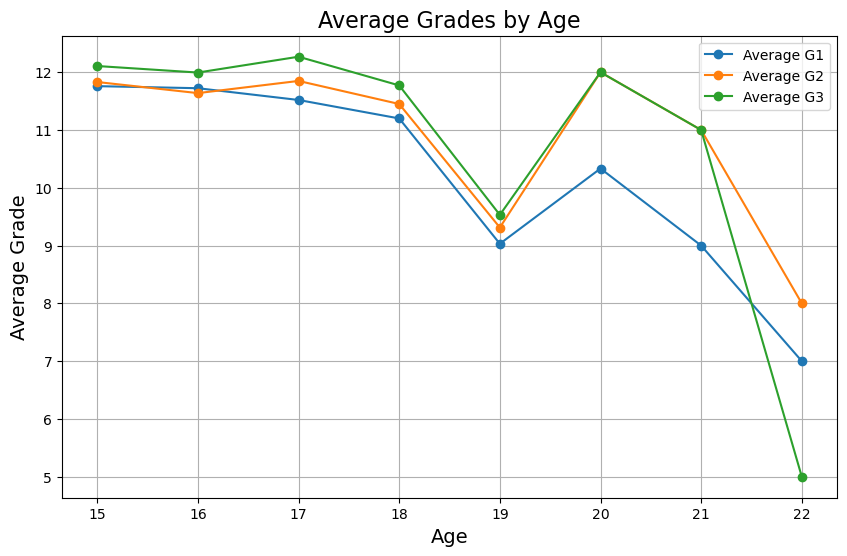

In [ ]:
# 1) Let's write age as range and convert label
avg_by_age = full_data.groupby('age').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_by_age['age'], avg_by_age['G1'], label='Average G1', marker='o')
plt.plot(avg_by_age['age'], avg_by_age['G2'], label='Average G2', marker='o')
plt.plot(avg_by_age['age'], avg_by_age['G3'], label='Average G3', marker='o')

plt.title('Average Grades by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Grade', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Let's define the age ranges and labels
age_ranges = [(15, 18), (18, 20), (20, 22)]
labels = [1, 2, 3]

# Create the age range column
full_data['age_range'] = pd.cut(full_data['age'], bins=[15, 18, 20, 22], labels=labels, right=False)

# Convert the age range labels to numeric
full_data['age_range'] = pd.to_numeric(full_data['age_range'])

In [ ]:
# Alcohol Consumption Score
full_data['alc_score'] = full_data['Dalc'] + full_data['Walc']

# Parental Education Average
full_data['parent_edu_avg'] = (full_data['Medu'] + full_data['Fedu']) / 2

# Stress Level
full_data['stress_level'] = full_data['failures'] + full_data['absences']

# Socializing Score
full_data['social_score'] = full_data['goout'] + full_data['freetime']

# Internet and Higher Education
full_data['internet_higher'] = (full_data['internet'] == 1) & (full_data['higher'] == 1)

# Total Study Time
full_data['total_study_time'] = full_data['studytime'] + full_data['traveltime']

# Parental Cohabitation Status
full_data['parent_cohabitation'] = (full_data['Pstatus'] == 1)

# Parental Occupation Match
full_data['parent_occ_match'] = (full_data['Mjob'] == full_data['Fjob'])

# Quality of Family Support
full_data['fam_support_quality'] = full_data['famrel'] * (full_data['famsup'] == 1)

# Extra-Curricular Engagement
full_data['extra_curricular'] = (full_data['activities'] == 1) + (full_data['paid'] == 1)

# Health and Wellness
full_data['health_wellness'] = full_data['health'] - full_data['absences']

# Parental Involvement
full_data['parent_involvement'] = full_data['reason'] + full_data['guardian']

full_data = full_data.replace({False: 0, True: 1})

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>⚙ Modelling </b></h1></center>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming 'full_data' is your DataFrame containing the dataset
full_data.dropna(inplace=True)

# Splitting the data into features (X) and target variable (G1, G2, G3)
X = full_data.drop(columns=['G1', 'G2', 'G3', 'age_range'])
y_G1 = full_data['G1']
y_G2 = full_data['G2']
y_G3 = full_data['G3']

# Splitting the data into training and testing sets
X_train, X_test, y_G1_train, y_G1_test, y_G2_train, y_G2_test, y_G3_train, y_G3_test = train_test_split(
    X, y_G1, y_G2, y_G3, test_size=0.2, random_state=42)

# Building the neural network model for G1
model_G1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for predicting G1
])

# Compiling the G1 model
model_G1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Training the G1 model
history_G1 = model_G1.fit(X_train, y_G1_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Predicting G1
y_pred_G1 = model_G1.predict(X_train) # -- G1 grade

# --- Evalution
y_pred_test_G1 = model_G1.predict(X_test)

mse_G1 = mean_squared_error(y_G1_test, y_pred_test_G1)
print(f"Mean Squared Error for G1: {mse_G1}")
# ---

# Building the neural network model for G2
model_G2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for predicting G2
])

# Compiling the G2 model
model_G2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Training the G2 model
history_G2 = model_G2.fit(X_train, y_G2_train, epochs=60, batch_size=32, validation_split=0.2, verbose=1)

# Predicting G2
y_pred_G2 = model_G2.predict(X_test) # -- G1 grade

# --- Evalution
y_pred_test_G2 = model_G2.predict(X_test)

mse_G2 = mean_squared_error(y_G2_test, y_pred_test_G2)
print(f"Mean Squared Error for G2: {mse_G2}")
# ---

# Concatenating predicted G1 and G2 with original features to predict G3
X_concat = pd.concat([X_train, y_G1_train , y_G2_train], axis=1)

# Building the neural network model for G3
model_G3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_concat.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for predicting G3
])

# Compiling the G3 model
model_G3.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Now train the G3 model
history_G3 = model_G3.fit(X_concat, y_G3_train, epochs=60, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the G3 model
X_test_concat = pd.concat([X_test, y_G1_test , y_G2_test], axis=1)

y_pred_G3 = model_G3.predict(X_test_concat)

mse_G3 = mean_squared_error(y_G3_test, y_pred_G3)
print(f"Mean Squared Error for G3: {mse_G3}")

Epoch 1/5
13/13 [==============================] - 1s 21ms/step - loss: 70.2941 - val_loss: 30.4539
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 14.6582 - val_loss: 9.1733
Epoch 3/5
13/13 [==============================] - 0s 7ms/step - loss: 12.2383 - val_loss: 7.9487
Epoch 4/5
13/13 [==============================] - 0s 6ms/step - loss: 9.2656 - val_loss: 8.7296
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Mean Squared Error for G1: 10.170278662231816
Epoch 1/60
13/13 [==============================] - 1s 18ms/step - loss: 19.1882 - val_loss: 12.1102
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 9.6946 - val_loss: 10.2235
Epoch 3/60
13/13 [==============================] - 0s 7ms/step - loss: 7.5330 - val_loss: 9.4440
Epoch 4/60
13/13 [==============================] - 0s 7ms/step - loss: 6.6332 - val_loss: 8.8794
Epoch 5/60
13/13 [==============================] - 0s 6ms/step - loss: 6.2158 - val_loss: 8.7255
Epoch 

In [ ]:
# Evalution
for i,y in enumerate([mse_G1 , mse_G2 , mse_G3]):
  print(f"Mean Squared Error for G{i+1}: {y}")

Mean Squared Error for G1: 10.170278662231816
Mean Squared Error for G2: 8.091877543466936
Mean Squared Error for G3: 2.160402518648921


In [ ]:
# Testing

new_data = pd.DataFrame(full_data.loc[333]).T

# Drop any unnecessary columns and handle missing values if necessary
new_data_processed = new_data.drop(columns=['G1', 'G2', 'G3', 'age_range']).dropna()

# Use the trained models to predict G1 and G2 for the new data
new_G1_pred = model_G1.predict(new_data_processed)
new_G2_pred = model_G2.predict(new_data_processed)

# Concatenate the new data with the predicted G1 and G2 values
new_data_processed.reset_index(inplace = True, drop = True)

new_data_concat = pd.concat([new_data_processed, pd.DataFrame(new_G1_pred, columns=['G1_pred']), pd.DataFrame(new_G2_pred, columns=['G2_pred'])], axis=1)

# Use the trained G3 model to predict G3 for the new data
new_G3_pred = model_G3.predict(new_data_concat)


# Print the predicted G1 values
print("Predicted G1 values for new data:")
print(new_G1_pred)

# Print the predicted G2 values
print("Predicted G2 values for new data:")
print(new_G2_pred)

# Print the predicted G3 values
print("Predicted G3 values for new data:")
print(new_G3_pred)

1/1 [==============================] - 0s 35ms/step
Predicted G1 values for new data:
[[11.361508]]
Predicted G2 values for new data:
[[13.832168]]
Predicted G3 values for new data:
[[14.087875]]


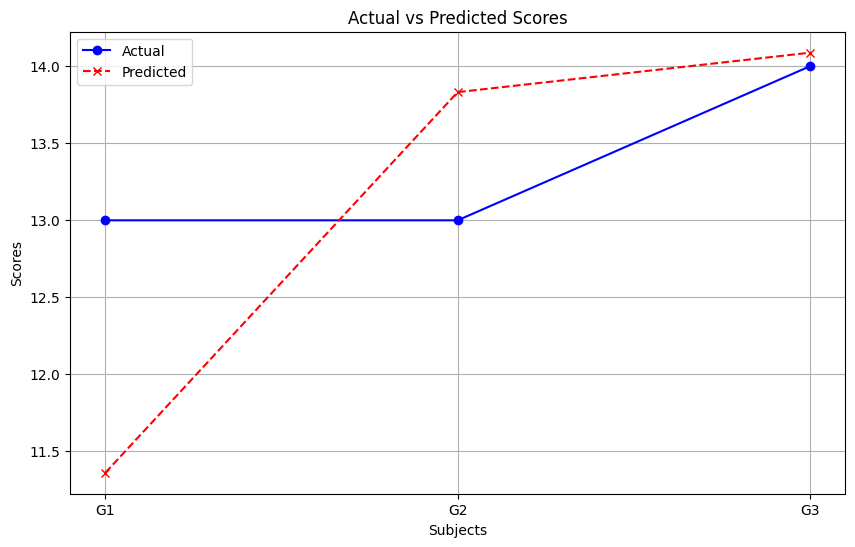

In [ ]:
# Now let's visualize scores
pred_data = pd.concat([pd.DataFrame(new_G1_pred, columns=['G1']), pd.DataFrame(new_G2_pred, columns=['G2']), pd.DataFrame(new_G3_pred, columns=['G3'])], axis=1)

# Actual and predicted scores
actual_scores = new_data[['G1', 'G2', 'G3']]
predicted_scores = pred_data[['G1', 'G2', 'G3']]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual scores
plt.plot(['G1', 'G2', 'G3'], actual_scores.iloc[0], label='Actual', marker='o', color='blue')

# Plotting predicted scores
plt.plot(['G1', 'G2', 'G3'], predicted_scores.iloc[0], label='Predicted', marker='x', linestyle='dashed', color='red')

# Setting labels and title
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>📱 Deploy</b></h1></center>

# Let's deploy model in gradio:

In [8]:
import pandas as pd
import gradio as gr
import tensorflow as tf

# Load the saved models with specifying the loss function
model_G1 = tf.keras.models.load_model("model_G1.h5", compile=False)
model_G2 = tf.keras.models.load_model("model_G2.h5", compile=False)
model_G3 = tf.keras.models.load_model("model_G3.h5", compile=False)

# Compile the models with the appropriate loss function
model_G1.compile(optimizer='adam', loss='mean_squared_error')
model_G2.compile(optimizer='adam', loss='mean_squared_error')
model_G3.compile(optimizer='adam', loss='mean_squared_error')

# Define a function to make predictions
def predict(school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob,
            reason, guardian, traveltime, studytime, failures, schoolsup, famsup,
            paid, activities, nursery, higher, internet, romantic, famrel, freetime,
            goout, Dalc, Walc, health, absences):
    # Prepare input data
    new_data = pd.DataFrame([[school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob,
            reason, guardian, traveltime, studytime, failures, schoolsup, famsup,
            paid, activities, nursery, higher, internet, romantic, famrel, freetime,
            goout, Dalc, Walc, health, absences]], columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                                                             'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
                                                             'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                                                             'Dalc', 'Walc', 'health', 'absences'])
    # Process input data
    new_data[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']] = new_data[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].replace({'yes':1,'no':0})
    new_data['famsize'] = new_data['famsize'].replace({'GT3':1,'LE3':0})
    new_data['address'] = new_data['address'].replace({'R':1,'U':0})
    new_data['school'] = new_data['school'].replace({'GP':1,'MS':0})
    new_data['sex'] = new_data['sex'].replace({'F':0,'M':1})
    new_data['Pstatus'] = new_data['Pstatus'].replace({'A':0,'T':1})
    mjob_mapping = {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
    fjob_mapping = {'teacher': 4, 'other': 2, 'services': 3, 'health': 1, 'at_home': 0}
    reason_mapping = {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
    guardian_mapping = {'mother': 1, 'father': 2, 'other': 0}
    new_data['Mjob'] = new_data['Mjob'].replace(mjob_mapping)
    new_data['Fjob'] = new_data['Fjob'].replace(fjob_mapping)
    new_data['reason'] = new_data['reason'].replace(reason_mapping)
    new_data['guardian'] = new_data['guardian'].replace(guardian_mapping)
    new_data = new_data.astype(int)
    # Alcohol Consumption Score
    new_data['alc_score'] = new_data['Dalc'] + new_data['Walc']

    # Parental Education Average
    new_data['parent_edu_avg'] = (new_data['Medu'] + new_data['Fedu']) / 2

    # Stress Level
    new_data['stress_level'] = new_data['failures'] + new_data['absences']

    # Socializing Score
    new_data['social_score'] = new_data['goout'] + new_data['freetime']

    # Internet and Higher Education
    new_data['internet_higher'] = (new_data['internet'] == 1) & (new_data['higher'] == 1)

    # Total Study Time
    new_data['total_study_time'] = new_data['studytime'] + new_data['traveltime']

    # Parental Cohabitation Status
    new_data['parent_cohabitation'] = (new_data['Pstatus'] == 1)

    # Parental Occupation Match
    new_data['parent_occ_match'] = (new_data['Mjob'] == new_data['Fjob'])

    # Quality of Family Support
    new_data['fam_support_quality'] = new_data['famrel'] * (new_data['famsup'] == 1)

    # Extra-Curricular Engagement
    new_data['extra_curricular'] = (new_data['activities'] == 1) + (new_data['paid'] == 1)

    # Health and Wellness
    new_data['health_wellness'] = new_data['health'] - new_data['absences']

    # Parental Involvement
    new_data['parent_involvement'] = new_data['reason'] + new_data['guardian']

    new_data = new_data.replace({False: 0, True: 1})

    # Use the trained models to predict G1 and G2
    new_G1_pred = model_G1.predict(new_data)
    new_G2_pred = model_G2.predict(new_data)

    # Concatenate input data with predicted G1 and G2
    new_data_concat = pd.concat([new_data, pd.DataFrame(new_G1_pred, columns=['G1_pred']), pd.DataFrame(new_G2_pred, columns=['G2_pred'])], axis=1)

    # Use the trained G3 model to predict G3
    new_G3_pred = model_G3.predict(new_data_concat)

    # Extract predictions
    G1_prediction = new_G1_pred[0][0]  # Assuming new_G1_pred is a scalar
    G2_prediction = new_G2_pred[0][0]  # Assuming new_G2_pred is a scalar
    G3_prediction = new_G3_pred[0][0]  # Assuming new_G3_pred is a scalar

    return G1_prediction, G2_prediction, G3_prediction



# Define the input and output components for Gradio
input_components = [
    gr.Dropdown(choices=["GP", "MS"], label="School"),
    gr.Radio(choices=["F", "M"], label="Sex"),
    gr.Number(label="Age"),
    gr.Radio(choices=["U", "R"], label="Address"),
    gr.Dropdown(choices=["LE3", "GT3"], label="Family Size"),
    gr.Radio(choices=["T", "A"], label="Parent Cohabitation Status"),
    gr.Number(label="Mother's Education"),
    gr.Number(label="Father's Education"),
    gr.Dropdown(choices=["at_home", "health", "other", "services", "teacher"], label="Mother's Job"),
    gr.Dropdown(choices=["at_home", "health", "other", "services", "teacher"], label="Father's Job"),
    gr.Dropdown(choices=["course", "other", "home", "reputation"], label="Reason for Choosing School"),
    gr.Dropdown(choices=["mother", "father", "other"], label="Guardian"),
    gr.Number(label="Travel Time"),
    gr.Number(label="Weekly Study Time"),
    gr.Number(label="Failures"),
    gr.Checkbox(label="Extra Educational Support"),
    gr.Checkbox(label="Family Educational Support"),
    gr.Checkbox(label="Extra Paid Classes"),
    gr.Checkbox(label="Extra-curricular Activities"),
    gr.Checkbox(label="Attended Nursery School"),
    gr.Checkbox(label="Wants to Take Higher Education"),
    gr.Checkbox(label="Has Internet Access"),
    gr.Checkbox(label="In a Romantic Relationship"),
    gr.Number(label="Quality of Family Relationships"),
    gr.Number(label="Free Time After School"),
    gr.Number(label="Going Out with Friends"),
    gr.Number(label="Workday Alcohol Consumption"),
    gr.Number(label="Weekend Alcohol Consumption"),
    gr.Number(label="Health Status"),
    gr.Number(label="Absences")
]

output_components = [
    gr.Textbox(label="Predicted Grade 1"),
    gr.Textbox(label="Predicted Grade 2"),
    gr.Textbox(label="Predicted Grade 3")
]

# Create the Gradio interface
app = gr.Interface(fn=predict, inputs=input_components, outputs=output_components)

# Run the Gradio interface
if __name__ == "__main__":
    app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d32f8672b793bdf2e6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Let's go to hugging face deploy:
# So that i put hagging face link here and please click and look at and use project: https://huggingface.co/spaces/riyadahmadov/student_performance_models

<center><h1 style="background-color: darkgreen; color: white; font-size: 30px;"><b>🔚 The End </b></h1></center>